In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [6]:
data = pd.read_excel("HW_Data_Set.xlsx")
data.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


Burada 20_target, 50_target ve 90_target olmak üzere 3 farklı hedef değişkenimiz bulunuyor. Burada 133 değişken üzerinde analiz yapıp, target verilerini ne kadar etkidiğini bulmaya çalışıyoruz.

# 1. Veri Istatistikleri ve Temizleme 

# 1.1. Veri Istatistikleri

### 1.1.1 Veri Özetleme

In [7]:
data.shape

(6167, 136)

In [8]:
desc_df = data.describe().T
null_count = data.isnull().sum()
null_percent = (data.isnull().sum() / data.count())*100
variance = data.var()

desc_df["variance"] =  round(variance,3)
desc_df["null_values"] = round(null_count,3)
desc_df["null__rate"] = round(null_percent,3)
desc_df.T

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
count,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,...,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000
mean,-0.803146,-0.803470,48.388890,48.289282,0.099609,49.488867,-18.497518,11.771485,11.773550,11.773392,...,0.000224,28.529204,-8.554792,-28.166694,0.490297,0.498188,0.490174,-0.057102,-2.906358,-3.315072
std,23.624403,23.624144,36.388526,36.478009,60.414625,12.198722,68.281120,6.803997,5.786089,4.970499,...,0.005660,26.316896,16.100087,23.271524,0.425376,0.228547,0.150483,14.834497,34.559778,36.841541
min,-131.000000,-131.000000,0.000000,0.000000,-100.000000,12.134540,-625.093855,1.050000,1.660000,2.580000,...,-0.023790,0.000000,-103.800000,-188.000000,0.000000,0.000000,0.083530,-15.780588,-37.142889,-38.573858
25%,-14.000000,-14.000000,14.285714,14.285714,-50.000000,40.868503,-45.687212,6.850000,7.260000,7.635000,...,-0.003230,10.700000,-11.700000,-39.000000,0.000000,0.323783,0.379894,-15.350354,-36.208094,-37.695273
50%,0.000000,0.000000,50.000000,50.000000,0.000000,49.549766,-2.817298,10.550000,11.040000,11.270000,...,-0.000053,21.300000,0.000000,-22.000000,0.473684,0.495192,0.487078,0.000000,-34.267756,-35.788391
75%,13.000000,13.000000,85.714286,85.714286,57.142857,58.504375,28.072613,14.950000,15.040000,14.960000,...,0.003414,38.400000,0.000000,-11.000000,1.000000,0.675730,0.601508,15.385945,35.879524,37.521892
max,76.000000,76.000000,100.000000,100.000000,100.000000,84.821848,81.105847,82.900000,54.240000,37.050000,...,0.023340,281.800000,0.000000,0.000000,1.000000,1.000000,0.868534,15.768767,37.038694,38.465649
variance,558.112000,558.100000,1324.125000,1330.645000,3649.927000,148.809000,4662.311000,46.294000,33.479000,24.706000,...,0.000000,692.579000,259.213000,541.564000,0.181000,0.052000,0.023000,220.062000,1194.378000,1357.299000
null_values,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 1.1.2. Numerik ve Kategorik Öznitelikler

In [9]:
num, cat = numeric_categoric_variable(data)

Numeric Column  :
 ['ind_5', 'ind_6', 'ind_8', 'ind_9', 'ind_10', 'ind_12', 'ind_13', 'ind_14', 'ind_15', 'ind_16', 'ind_17', 'ind_18', 'ind_19', 'ind_20', 'ind_21', 'ind_22', 'ind_23', 'ind_25', 'ind_26', 'ind_27', 'ind_28', 'ind_29', 'ind_30', 'ind_31', 'ind_32', 'ind_33', 'ind_34', 'ind_35', 'ind_36', 'ind_37', 'ind_39', 'ind_40', 'ind_41', 'ind_42', 'ind_43', 'ind_44', 'ind_45', 'ind_46', 'ind_47', 'ind_48', 'ind_49', 'ind_50', 'ind_51', 'ind_52', 'ind_53', 'ind_56', 'ind_58', 'ind_61', 'ind_62', 'ind_65', 'ind_67', 'ind_70', 'ind_71', 'ind_74', 'ind_77', 'ind_82', 'ind_83', 'ind_88', 'ind_92', 'ind_102', 'ind_116', 'ind_118', 'ind_122', 'ind_124', 'ind_128', 'ind_130', 'ind_132', 'ind_134', 'ind_136', 'ind_139', 'ind_142', 'ind_145', 'ind_147', 'ind_150', 'ind_153', 'ind_156', 'ind_164', 'ind_168', 'ind_172', 'ind_176', 'ind_179', 'ind_181', 'ind_188', 'ind_194', 'ind_212', 'ind_217', 'ind_225', 'ind_228', 'ind_234', 'ind_237', 'ind_239', 'ind_241', 'ind_243', 'ind_309', 'ind_310'

Kategorik verilerde kaç farklı kategori mevcut olduğunu kontrol ediyoruz. ind_420 ve ind_422 özniteliklerde sırasıyla 582 ve 573 olmak üzere farklı kategori mevcut olduğu çıkıyor. Bu nedenle group by ile değerleri kontrol ettiğimizde tüm değerlerin numerik olduğunu ve "?" olarak girilen 1041 satır kirli veri olduğunu görüyoruz. Veri Temizleme işlemi uygulamamız gerekiyor.

In [10]:
for i in data.select_dtypes(include=["object"]).columns:
    print(i,": ",data[i].value_counts().count())

ind_109 :  2
ind_420 :  582
ind_422 :  573


In [11]:
data.groupby("ind_420").count().tail(5)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_414,ind_416,ind_418,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
ind_420,,,,,,,,,,,,,,,,,,,,,
288,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
290,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
291,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
297,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
?,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,...,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041


In [12]:
data.groupby("ind_422").count().tail(5)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_414,ind_416,ind_418,ind_420,ind_424,ind_426,ind_428,20_target,50_target,90_target
ind_422,,,,,,,,,,,,,,,,,,,,,
117,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
118,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
119,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
124,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
?,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,...,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041


## 1.2 Veri Temizleme ve Dönüştürme

### 1.2.1. Veri Temizleme

### 1.2.1.1. Veri Temizleme (Replace with NULL)

Burada ind_420 ve ind_422 özniteliklerinde "?" değerlerini NULL değerler ile değiştiriyoruz. Böylece bu iki öznitelik numerik değerlere dönüşüyor

In [13]:
data["ind_420"] = data["ind_420"].replace("?", np.nan)
data["ind_422"] = data["ind_422"].replace("?", np.nan)

#### 1.2.1.1. Veri Temizleme (Drop columns)

Burada "?" değerleri içeren ind_420 ve ind_422 özniteliklerini verisetimizden siliyoruz.

In [293]:
data = data.drop(["ind_420", "ind_422"], axis=1)
data.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0.002371,2.0,-49.6,-54,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.003074,0.8,-55.6,-60,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.004366,0.9,-61.8,-65,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.004198,0.1,-79.8,-86,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


### 1.2.2. Veri Dönüştürme (Label Encoder)

ind_109 değişkeni kategorik değişkenlerdir. GREEN ve RED değerleri aldığı için hedef değişkeni tahmin etmede önemli olacağını düşünerek dönüştürme işlemi uyguladım.

In [236]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(data["ind_109"])
data["ind_109"] = le.fit_transform(data["ind_109"])

np.unique(data["ind_109"])

array([0, 1])

In [14]:
dummy = pd.get_dummies(data["ind_109"])
data_dummy = pd.concat([data, dummy],axis=1)
data_dummy = data_dummy.drop(["ind_109"], axis=1)
data_dummy.head()
data = data_dummy

In [15]:
num, cat = numeric_categoric_variable(data)

Numeric Column  :
 ['ind_5', 'ind_6', 'ind_8', 'ind_9', 'ind_10', 'ind_12', 'ind_13', 'ind_14', 'ind_15', 'ind_16', 'ind_17', 'ind_18', 'ind_19', 'ind_20', 'ind_21', 'ind_22', 'ind_23', 'ind_25', 'ind_26', 'ind_27', 'ind_28', 'ind_29', 'ind_30', 'ind_31', 'ind_32', 'ind_33', 'ind_34', 'ind_35', 'ind_36', 'ind_37', 'ind_39', 'ind_40', 'ind_41', 'ind_42', 'ind_43', 'ind_44', 'ind_45', 'ind_46', 'ind_47', 'ind_48', 'ind_49', 'ind_50', 'ind_51', 'ind_52', 'ind_53', 'ind_56', 'ind_58', 'ind_61', 'ind_62', 'ind_65', 'ind_67', 'ind_70', 'ind_71', 'ind_74', 'ind_77', 'ind_82', 'ind_83', 'ind_88', 'ind_92', 'ind_102', 'ind_116', 'ind_118', 'ind_122', 'ind_124', 'ind_128', 'ind_130', 'ind_132', 'ind_134', 'ind_136', 'ind_139', 'ind_142', 'ind_145', 'ind_147', 'ind_150', 'ind_153', 'ind_156', 'ind_164', 'ind_168', 'ind_172', 'ind_176', 'ind_179', 'ind_181', 'ind_188', 'ind_194', 'ind_212', 'ind_217', 'ind_225', 'ind_228', 'ind_234', 'ind_237', 'ind_239', 'ind_241', 'ind_243', 'ind_309', 'ind_310'

## 2. Feature Selection (Correlation)

In [16]:
print(correlation_df(data, ["20_target","50_target","90_target"]).sort_values(by="Corr", ascending=False).head(7),"\n")
print(correlation_df(data, ["20_target","50_target","90_target"]).sort_values(by="Corr", ascending=True).head(7))

     feature1 feature2      Corr
9043    GREEN      RED  1.000000
8910  ind_403  ind_404  1.000000
7871  ind_225  ind_234  0.999907
6200  ind_102  ind_128  0.999641
8380  ind_316  ind_318  0.998663
8100  ind_241  ind_243  0.997372
6423  ind_122  ind_136  0.996468 

     feature1 feature2      Corr
8248  ind_310  ind_399  0.000009
2456   ind_27  ind_321  0.000044
3700   ind_40   ind_51  0.000055
8796  ind_351  ind_397  0.000056
8757  ind_347  ind_410  0.000095
2580   ind_28  ind_347  0.000119
4046   ind_43  ind_217  0.000128


/home/asus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [55]:
fs_df = layer1(data ,["20_target","50_target","90_target"], 0.6)
fs_df.head()

,ind_5,ind_8,ind_9,ind_14,ind_18,ind_26,ind_27,ind_28,ind_40,ind_42,...,ind_338,ind_340,ind_344,ind_347,ind_349,ind_351,ind_416,20_target,50_target,90_target
0,19,100.0,85.714286,23.80,9.1100,-0.002670,0.000010,66.666667,3,-5,...,1.197238,-0.319064,0.0,0.0,0.0,0.0,-49.6,15.135802,35.625252,36.997753
1,24,100.0,78.571429,11.45,9.2225,-0.003111,-0.000191,66.666667,3,-6,...,1.197328,-0.318905,0.0,0.0,0.0,0.0,-55.6,15.143348,35.643013,37.016198
2,30,100.0,71.428571,8.75,9.3125,-0.003530,-0.000375,66.666667,3,-4,...,1.197419,-0.318831,0.0,0.0,0.0,0.0,-58.4,15.146870,35.651301,-37.024805
3,37,100.0,64.285714,7.80,9.4150,-0.003961,-0.000641,66.666667,3,-5,...,1.197509,-0.318696,0.0,0.0,0.0,0.0,-61.8,15.153283,0.000000,-37.040483
4,41,100.0,57.142857,14.90,9.8925,-0.004624,-0.000319,66.666667,2,-18,...,1.197600,-0.318155,0.0,0.0,0.0,0.0,-79.8,-15.179065,-35.727079,-37.103503


In [56]:
gg = fs_df.drop(["50_target","90_target"],axis=1)
fs_df = fs_df[layer2(gg, 10, "20_target")]
fs_df["20_target"] = data["20_target"]
fs_df.head()

,ind_27,ind_18,ind_239,ind_316,ind_324,ind_330,ind_5,ind_338,ind_334,ind_332,20_target
0,0.000010,9.1100,0.000217,98.905563,-0.000062,-0.157039,19,1.197238,-0.000091,20.967742,15.135802
1,-0.000191,9.2225,0.000217,98.859627,-0.000062,-0.156961,24,1.197328,-0.000091,20.800000,15.143348
2,-0.000375,9.3125,0.000217,98.839991,-0.000062,-0.156925,30,1.197419,-0.000091,20.634921,15.146870
3,-0.000641,9.4150,0.000217,98.801500,-0.000062,-0.156858,37,1.197509,-0.000091,20.472441,15.153283
4,-0.000319,9.8925,0.000217,98.637028,-0.000062,-0.156592,41,1.197600,-0.000091,20.312500,-15.179065


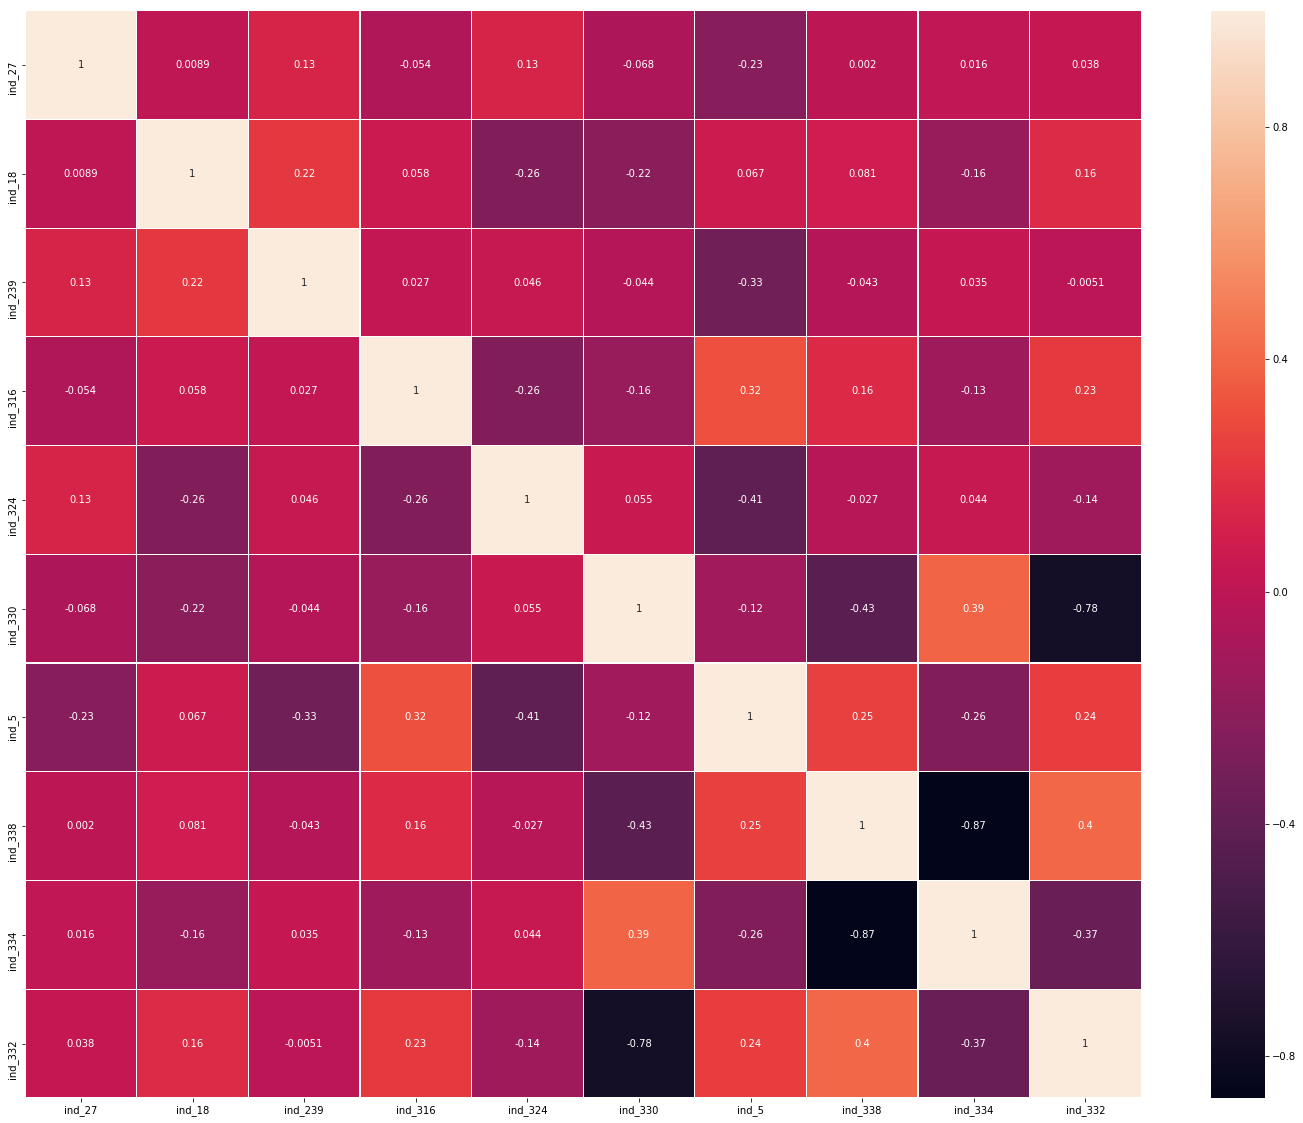

In [57]:
fig, ax = plt.subplots(figsize=(25,20))  
corrmat = fs_df.drop(["20_target"], axis=1)
sns.heatmap(corrmat.corr(), annot=True, linewidths=0.2, ax=ax)

In [23]:
#print(correlation_df(fs_df, ["20_target","50_target","90_target"]).sort_values(by="Corr", ascending=False).head(5),"\n")
#print(correlation_df(fs_df, ["20_target","50_target","90_target"]).sort_values(by="Corr", ascending=True).head(5))

# 3. Box Plot (Outlier ve 5 Five Number Summary)

Verilerimizde cok sayida Outlier deger oldugunu boxplot grafigi ile goruyoruz. Burada iki yaklasim uygulanabilir. 

1. Outlier degerler silinebilir 
2. Veriler normalize edilebilir

Burada orjinal veriler oldugunu dusunerek outlier degerleri remove etmeyip normalize yontemini seciyoruz. Normalize yöntemi olarak StandardScaler, Z-Score, Min-Max uygulayabiliriz.

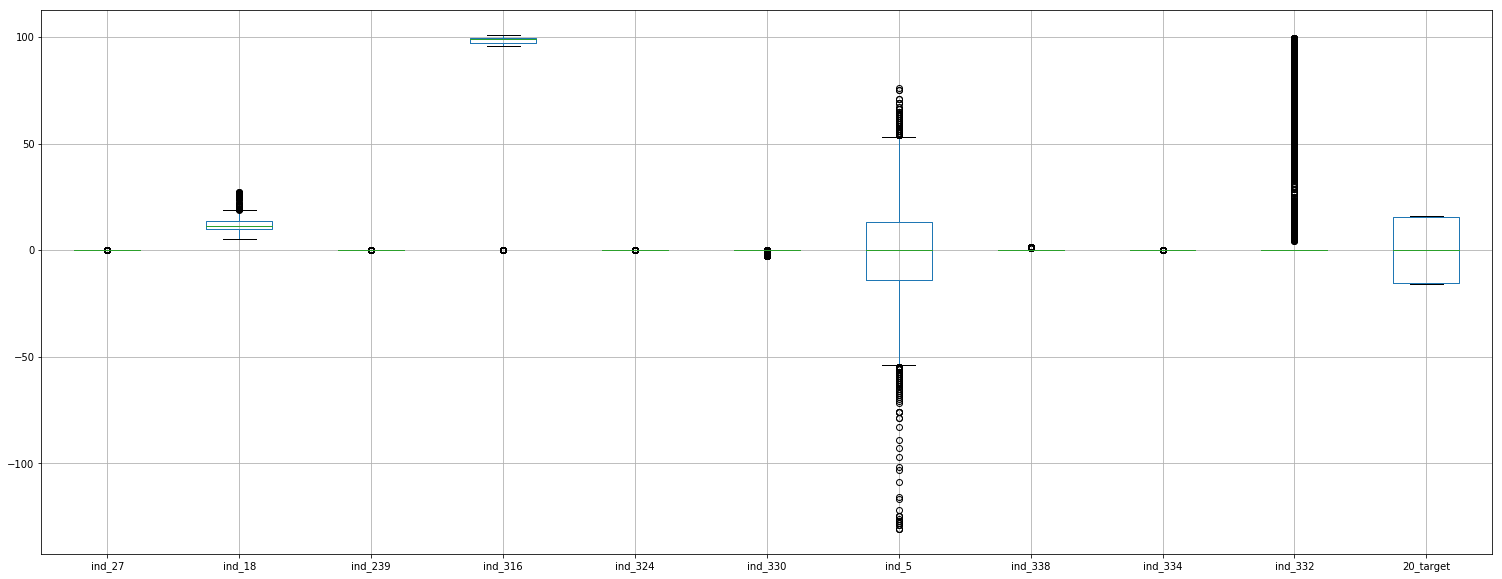

In [58]:
plt.figure(figsize=(26,10))
fs_df.boxplot()
plt.show()

# 4. Histogam (Dagilim Grafigi)

Burada ozniteliklerin cogunun normal dagilimdan gelmedigini goruyoruz. Bu nedenle normal dagildigini dusundugumuz oznitelikler icin shapiro normalllik testi uygulamamiz gerekiyor. 

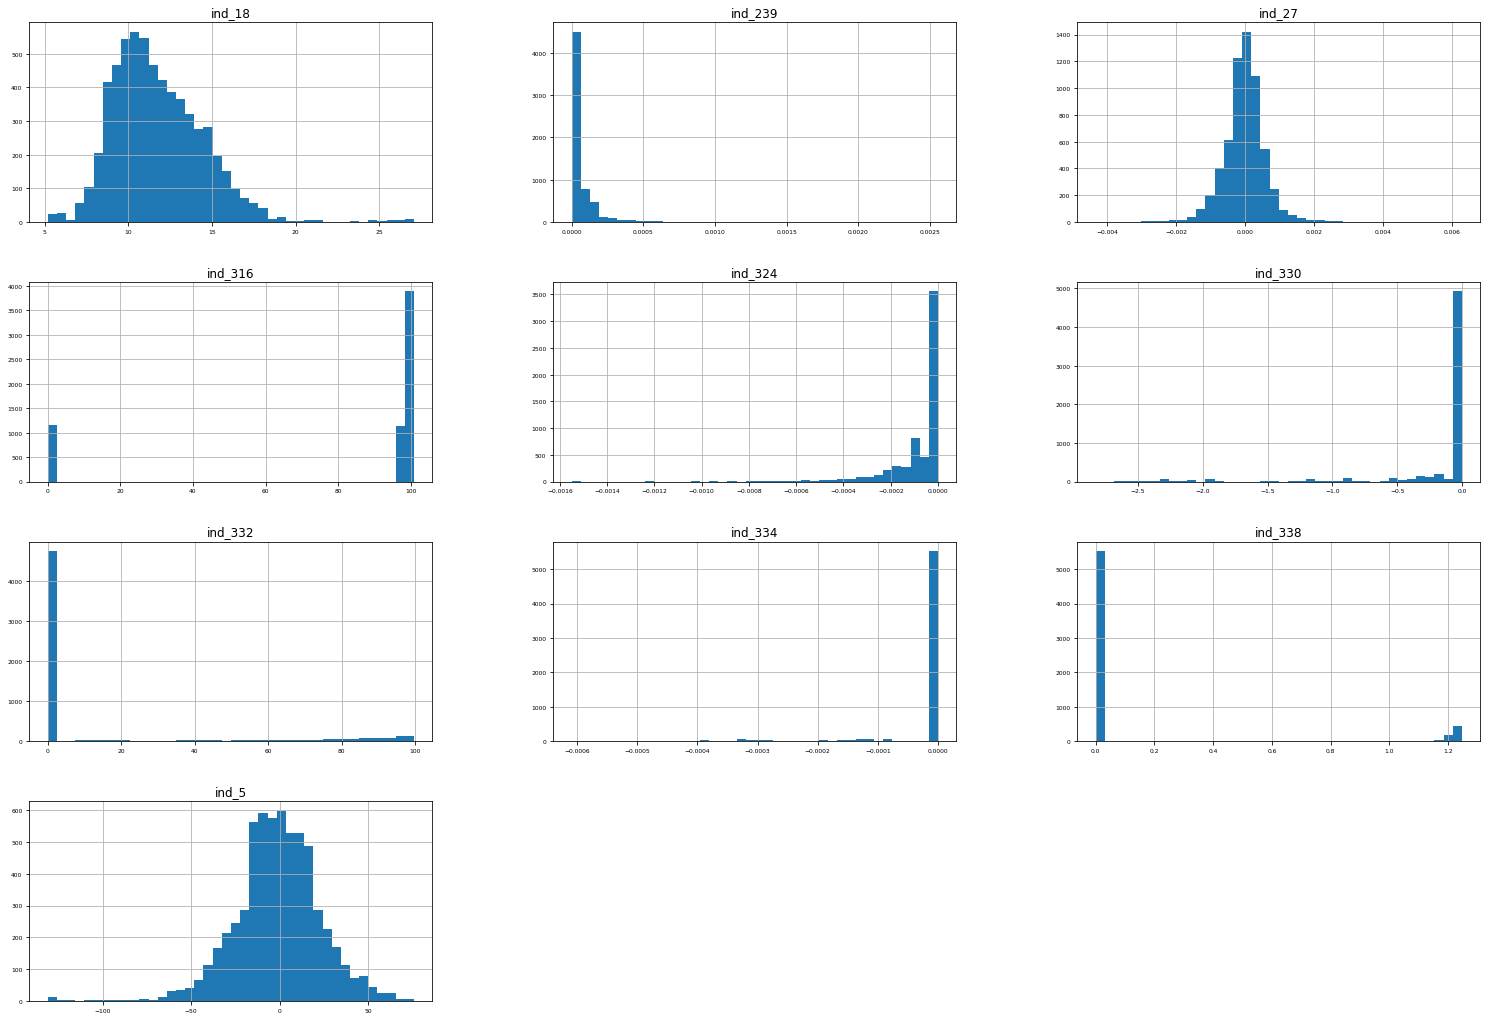

In [59]:
data_df = fs_df.drop(["20_target"], axis=1)
data_df.hist(figsize=(26,18), bins=40, xlabelsize=6, ylabelsize=6)
plt.show()

### Normalization

In [304]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(fs_df)
dd = scaler.transform(fs_df)
fs_df = pd.DataFrame(dd, columns=fs_df.columns)
fs_df.head()

,ind_5,ind_8,ind_9,ind_14,ind_18,ind_26,ind_27,ind_28,ind_29,ind_40,...,ind_349,ind_351,ind_403,ind_404,ind_412,ind_416,20_target,50_target,90_target,RED
0,0.724638,1.0,0.857143,0.277947,0.179402,0.786663,0.409832,1.0,0.781077,0.4,...,1.0,0.0,0.765524,0.234476,0.555085,0.522158,0.979937,0.980946,0.980946,0.0
1,0.748792,1.0,0.785714,0.127062,0.184535,0.751886,0.390871,1.0,0.730082,0.4,...,1.0,0.0,0.716052,0.283948,0.570000,0.464355,0.980177,0.981186,0.981186,0.0
2,0.777778,1.0,0.714286,0.094075,0.188641,0.718925,0.373539,1.0,0.751730,0.4,...,1.0,0.0,0.567600,0.432400,0.580332,0.437380,0.980288,0.981297,0.020107,0.0
3,0.811594,1.0,0.642857,0.082468,0.193317,0.684934,0.348484,1.0,0.795790,0.4,...,1.0,0.0,0.446071,0.553929,0.597408,0.404624,0.980491,0.500702,0.019904,0.0
4,0.830918,1.0,0.571429,0.169212,0.215100,0.632729,0.378814,1.0,0.947851,0.2,...,1.0,0.0,0.501860,0.498140,0.593840,0.231214,0.019066,0.019086,0.019086,0.0


### Distribution Plot

In [60]:
import pylab
import scipy.stats as stats
num, cat = numeric_categoric_variable(fs_df)

Numeric Column  :
 ['ind_27', 'ind_18', 'ind_239', 'ind_316', 'ind_324', 'ind_330', 'ind_5', 'ind_338', 'ind_334', 'ind_332', '20_target'] 

Categoric Column :
 []


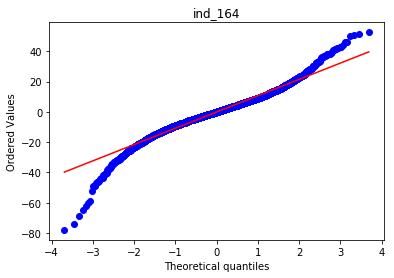

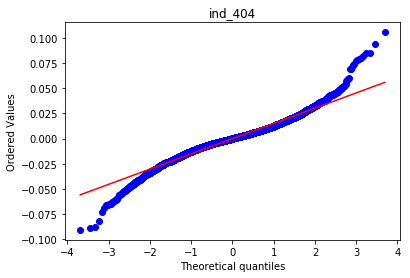

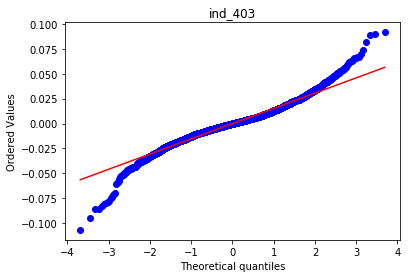

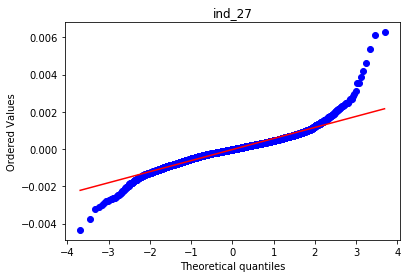

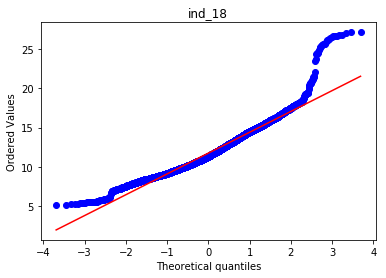

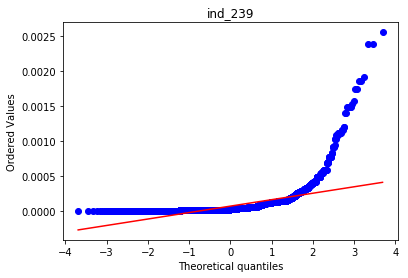

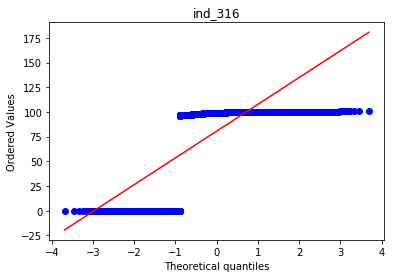

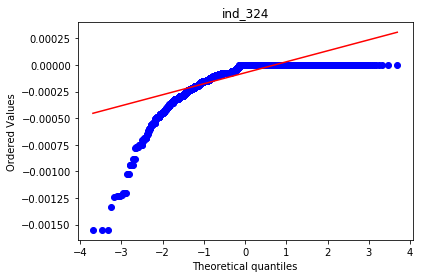

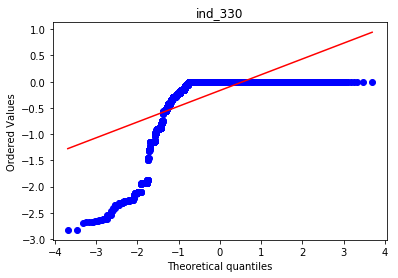

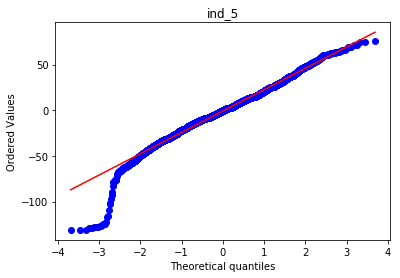

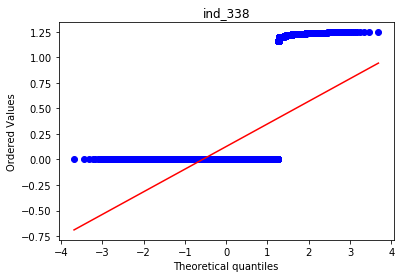

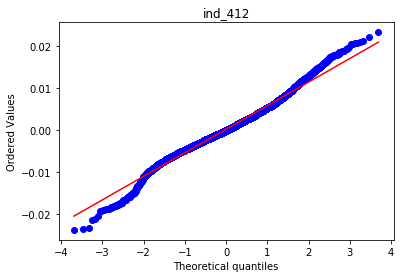

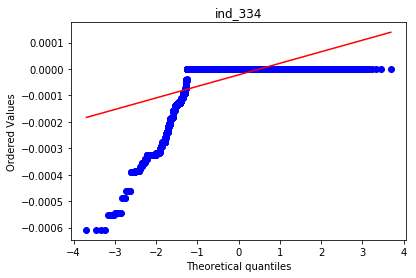

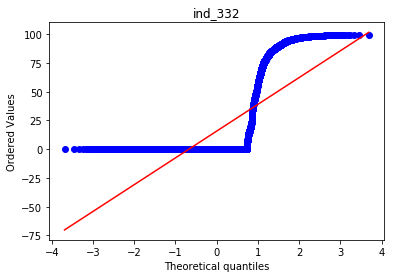

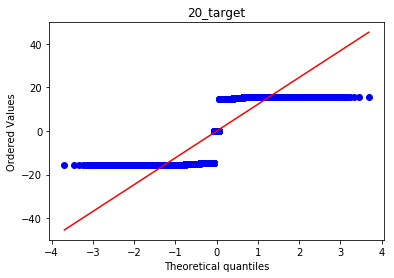

In [24]:
for i in num:
    stats.probplot(fs_df[i], dist="norm", plot=plt)
    plt.title(i)
    plt.show()

## Multiple Linear Regression

In [61]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

df = fs_df.copy()
x_df = df.drop(["20_target"], axis=1)
y_df  = df["20_target"]

x_train, x_test, y_train, y_test = train_test_split(x_df,y_df, test_size=0.2, random_state=42)

In [62]:
x_train.shape, y_train.shape, x_test.shape, x_test.shape

((4933, 10), (4933,), (1234, 10), (1234, 10))

In [63]:
lm = sm.OLS(y_train, np.asarray(x_train))
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              20_target   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     7.620
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           3.51e-12
Time:                        18:39:12   Log-Likelihood:                -20271.
No. Observations:                4933   AIC:                         4.056e+04
Df Residuals:                    4923   BIC:                         4.063e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -619.0885    352.282     -1.757      0.079   -1309.719      71.542
x2            -0.1022      0.041     -2.517      0.012      -0.182      -0.023
x3         -2845.3464   1622.628     -1.754      0.080   -6026.421     335.728
x4             0.0032      0.005      0.591      0.555      -0.007       0.014
x5         -3532.4296   1789.796     -1.974      0.048   -7041.228     -23.632
x6             1.3914      0.736      1.891      0.059      -0.051       2.834
x7            -0.0049      0.011     -0.442      0.659      -0.027       0.017
x8            -1.6124      1.186     -1.360      0.174      -3.937       0.712
x9         -1.623e+04   5730.569     -2.832      0.005   -2.75e+04   -4994.374
x10            0.0546      0.011      4.943      0.000       0.033       0.076
==============================================================================
Omnibus:                        0.567   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.753   Jarque-Bera (JB):              733.268
Skew:                           0.026   Prob(JB):                    5.93e-160
Kurtosis:                       1.112   Cond. No.                     2.50e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Elimination 1

In [69]:
x_train = x_train.drop(["ind_316"], axis=1)
lm = sm.OLS(y_train, np.asarray(x_train))
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              20_target   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     8.429
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           1.35e-12
Time:                        18:42:02   Log-Likelihood:                -20271.
No. Observations:                4933   AIC:                         4.056e+04
Df Residuals:                    4924   BIC:                         4.062e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -623.3579    352.185     -1.770      0.077   -1313.797      67.082
x2            -0.0834      0.025     -3.305      0.001      -0.133      -0.034
x3         -2778.8101   1618.611     -1.717      0.086   -5952.009     394.389
x4         -3621.9550   1783.256     -2.031      0.042   -7117.932    -125.978
x5             1.4257      0.733      1.944      0.052      -0.012       2.864
x6            -0.0037      0.011     -0.340      0.734      -0.025       0.018
x7            -1.5277      1.177     -1.298      0.194      -3.835       0.780
x8         -1.587e+04   5697.674     -2.785      0.005    -2.7e+04   -4698.575
x9             0.0555      0.011      5.060      0.000       0.034       0.077
==============================================================================
Omnibus:                        0.565   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.754   Jarque-Bera (JB):              733.390
Skew:                           0.026   Prob(JB):                    5.58e-160
Kurtosis:                       1.112   Cond. No.                     9.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Elimination 2

In [71]:
x_train = x_train.drop(["ind_5"], axis=1)
lm = sm.OLS(y_train, np.asarray(x_train))
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              20_target   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     9.470
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           4.44e-13
Time:                        18:42:56   Log-Likelihood:                -20271.
No. Observations:                4933   AIC:                         4.056e+04
Df Residuals:                    4925   BIC:                         4.061e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -601.8182    346.425     -1.737      0.082   -1280.966      77.330
x2            -0.0817      0.025     -3.302      0.001      -0.130      -0.033
x3         -2607.0024   1537.807     -1.695      0.090   -5621.789     407.784
x4         -3388.1283   1645.563     -2.059      0.040   -6614.166    -162.090
x5             1.4043      0.731      1.922      0.055      -0.028       2.837
x6            -1.5377      1.176     -1.307      0.191      -3.844       0.769
x7         -1.568e+04   5669.720     -2.765      0.006   -2.68e+04   -4563.199
x8             0.0549      0.011      5.073      0.000       0.034       0.076
==============================================================================
Omnibus:                        0.559   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.756   Jarque-Bera (JB):              733.487
Skew:                           0.026   Prob(JB):                    5.31e-160
Kurtosis:                       1.112   Cond. No.                     9.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Burada modelimizdeki hatalar standard dagilima gore nasil bir dagilim gosterdigini hesapliyoruz. Hatamizin standard dagilimdan gelmesi gerekiyor. Grafikte goruldugu gibi hatalarimiz uclarda oldugundan outlier gozlemler bulunuyor. Yani modelimiz dogru bir fit yapmamis.

Leverage v.s. Studentized Residuals


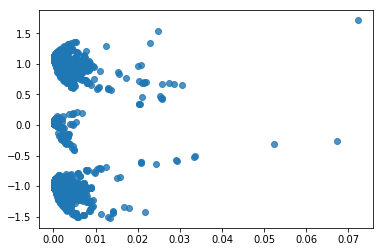

In [73]:
influence = model.get_influence()
resid_student = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag
print("Leverage v.s. Studentized Residuals")
sns.regplot(leverage, model.resid_pearson, fit_reg=False)

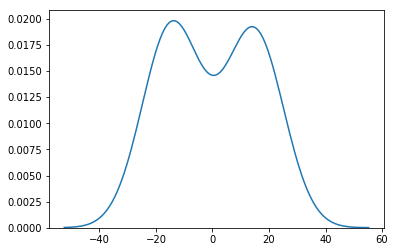

In [77]:
hw_df = pd.concat([x_train , pd.Series(model.resid, name = 'resid'), pd.Series(model.predict(), name = "predict")], axis = 1)
sns.kdeplot(np.array(hw_df.resid), bw=10)
plt.show()

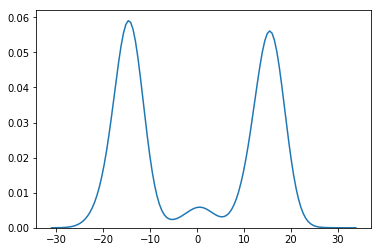

In [76]:
sns.distplot(np.array(hw_df.resid), hist=False)
plt.show()

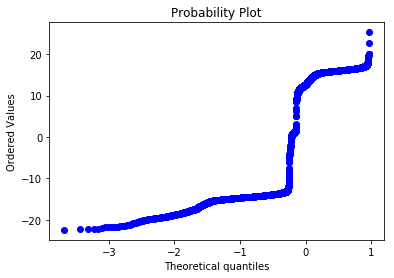

In [78]:
import pylab
stats.probplot(hw_df.resid, dist="norm", plot=pylab)
pylab.show()

In [80]:
from scipy.stats import shapiro

stat, p =shapiro(hw_df.resid)
alpha = 0.05
if p > alpha:
    print('Hatalar Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)')
else:
    print('Hatalar Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)')

Hatalar Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)


/home/asus/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


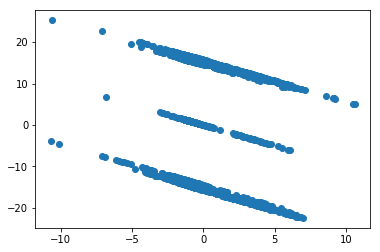

In [81]:
resid = model.resid
plt.scatter(model.predict(), resid)

In [93]:
from sklearn.metrics import mean_squared_error, r2_score
print("Train MSE: ",np.sqrt(mean_squared_error(y_train, model.predict(x_train))))
print("Test MSE: ",np.sqrt(mean_squared_error(y_test, model.predict(x_test[x_train.columns]))))


Train MSE:  14.736210313607808
Test MSE:  14.746178573100563
